Actual data mapping YearsExperience to Salary:

In [81]:
import ipywidgets
import numpy as np
import pandas as pd

from IPython.display import HTML, display

from itables import init_notebook_mode
from matplotlib import pyplot as plt
from time import sleep

display(HTML("""
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js"></script>
"""))

sleep(0.1)
init_notebook_mode(all_interactive=True)

data = pd.read_csv('Salary.csv')
data

<IPython.core.display.Javascript object>

YearsExperience,Salary


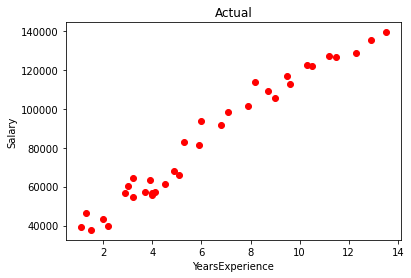

In [82]:
plt.plot(data['YearsExperience'], data['Salary'], 'ro')
plt.title('Actual')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Using the Objective of Least Squares (OLS) method, we will find a and b values to complete our linear regression formula y = a + b * x.

1. Calculate the mean YearsExperience.
2. Calculate the mean Salary.
3. Calculate the covariance of of YearsExperience and Salary.
4. Calculate the variance of YearsofExperience.
5. Determine values for a and b for the formula y = a + b * x.

In [83]:
ye_mean = np.mean(data['YearsExperience'].to_list())

In [84]:
s_mean = np.mean(data['Salary'].to_list())

In [85]:
cov = (data['YearsExperience'] - ye_mean) * (data['Salary'] - s_mean)

In [86]:
ye_var = (data['YearsExperience'] - ye_mean)**2

In [98]:
b = cov.sum() / ye_var.sum()

In [99]:
a = s_mean - (b * ye_mean)

Our linear regression formula is:

In [100]:
y = a + b * data['YearsExperience']
print(f'y = {a} + {b} * YearsExperience')

y = 28859.526194531456 + 8731.941047062495 * YearsExperience


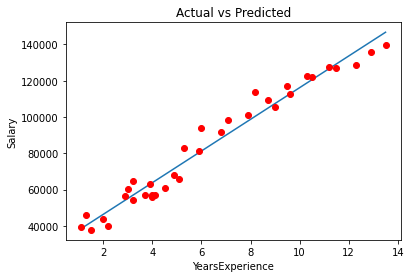

In [101]:
plt.plot(data['YearsExperience'], y)
plt.plot(data['YearsExperience'], data['Salary'], 'ro')
plt.title('Actual vs Predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

As we can see, the predicted blue line appears to follow the actual data in a predictable, linear fashion.

Salary Prediction, up to 50 years based on linear trend:

In [ ]:
y_predicted = a + b * range(0, 51)

caption = ipywidgets.Label(value='Select the number of years of experience from 0 to 50.')
float_slider = ipywidgets.IntSlider(
    value=0,
    min=0,
    max=50,
    step=1,
    description='Years Experience:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
    layout={'width': '100%'},
)
output = ipywidgets.Output()
display(float_slider, caption)

def on_value_change(change):
    with output:
        caption.value = 'Predicted Salary: ${:,.0f}'.format(y_predicted[change['new']])

float_slider.observe(on_value_change, names='value')